In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split,GridSearchCV
%matplotlib inline
import matplotlib as plt
from sklearn.svm import SVR
from sklearn import metrics



df=pd.read_excel(r'/Users/Vishal/ifp1.xlsx')
df.columns=['Time','Load']
scaler = MinMaxScaler()#USING SCALING TO BRING DATA TO 0 TO 1 RANGE
df[['Time', 'Load']] = scaler.fit_transform(df[['Time', 'Load']])
df

,Time,Load
0,0.000000,0.000000
1,0.020051,0.005650
2,0.036773,0.005650
3,0.056840,0.005650
4,0.073563,0.005650
...,...,...
137,0.943126,0.011299
138,0.953160,0.011299
139,0.969882,0.011299
140,0.986622,0.005650


In [2]:
from sklearn.model_selection import train_test_split
x=df[['Time']]
y=df.Load

xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=0.8)#SPLITTING THE DATA SET IN 80:20 TRAIN:TEST RATIO


In [3]:
lml=SVR('rbf')# WE ARE USING RBF MODEL 
parameters={'gamma':[55,100,1000,1200,1300,1400,1500,1450,1550,1600,1520,1510,1530,1540,1550,1560,1460,1470,1490,1480,1600,1650],'epsilon':[0.1,0.01,0.001,1,0.5,0.005,0.0005]}
#NOW USING GRIDSEARCHCV WILL FIND THE BEST HYPERPARAMETERS GAMMA AND EPSILON BY TRIAL AND ERROR
rbf=GridSearchCV(lml,parameters,scoring='neg_mean_squared_error',cv=10)
rbf.fit(xtrain,ytrain)

GridSearchCV(cv=10, error_score=nan,
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='scale', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'epsilon': [0.1, 0.01, 0.001, 1, 0.5, 0.005, 0.0005],
                         'gamma': [55, 100, 1000, 1200, 1300, 1400, 1500, 1450,
                                   1550, 1600, 1520, 1510, 1530, 1540, 1550,
                                   1560, 1460, 1470, 1490, 1480, 1600, 1650]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [4]:

print(rbf.best_params_)#FINALLY AFTER RUNNING IT RETURNS THE BEST PARAMETERS AND APPLIES IT TO MODEL RBF

{'epsilon': 0.0005, 'gamma': 1000}


0.9970552743053541


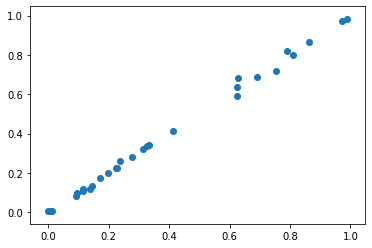

In [5]:
rbfp=rbf.predict(xtest)#PREDICTING THE VALUES
print(metrics.r2_score(ytest,rbfp))# NOW SEEING WE ACHIEVE .99 R2 SCORE WHICH MEANS DATA IS VERY CLOSELY PREDICTED
plt.pyplot.scatter(rbfp,ytest)#PLOTTING THE PREDICTED VALUES AGAINST ACTUAL VALUES WE SEE IT IS LINEAR WHICH IS EXTREMEMLY ACURRATE

In [6]:
print(metrics.mean_absolute_error(ytest,rbfp))#absolute mean error
print(metrics.mean_squared_error(ytest,rbfp))#mean squared error
print(np.sqrt(metrics.mean_squared_error(ytest,rbfp)))# rmse
(metrics.r2_score(ytest,rbfp))#R2 SCORE SHOULD BE CLOSE TO 1

#WE CAN THAT THE ERRORS ARE VERY CLOSE TO 0 WHICH IS THE GOAL

0.010724246937907385
0.00027873720152388367
0.016695424568542235


0.9970552743053541

In [7]:
yp=np.array(rbfp)
yt=np.array(ytest)
ac=(np.vstack((rbfp,ytest)).T)
ac
df1=pd.DataFrame(data=ac,columns=['Pred','Actual'])
df1
#CREATED A DATAFRAME THAT DISPLAYS PRED VS ACTUAL VALUES WE CAN SEE IT IS VERY CLOSE

,Pred,Actual
0,0.277550,0.282486
1,0.970807,0.971751
2,0.143489,0.135593
3,0.625213,0.638418
4,0.092511,0.084746
5,0.008388,0.005650
6,0.862940,0.864407
7,0.627233,0.683616
8,0.755046,0.717514
9,0.237638,0.259887
